In [1]:
import numpy as np #numerical work
import pandas as pd #dataframe
import matplotlib.pyplot as plt #graphs and charts
import scipy as sc #stats
import sklearn as sk #modelling
import seaborn as sns #graphing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv('dataset3.csv')
print(df)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
#first five rows
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


FILTERING + TRANSFORMATION

In [5]:
# df.drop('Patient ID', axis=1, inplace=True)
# print(df)

# df.drop('Country', axis=1, inplace=True)
# print(df)

# df.drop('Continent', axis=1, inplace=True)
# print(df)

# df.drop('Hemisphere', axis=1, inplace=True)
# print(df)

In [6]:
# # Split "Blood Pressure" into two separate columns
# df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True)

# # Convert the new columns to numeric
# df['Systolic_BP'] = pd.to_numeric(df['Systolic_BP'])
# df['Diastolic_BP'] = pd.to_numeric(df['Diastolic_BP'])

# # Drop the original "Blood Pressure" column
# df.drop(columns=['Blood Pressure'], inplace=True)

# # Encode "Sex" variable
# gender_mapping = {"Male": 0, "Female": 1}
# df["Sex"] = df["Sex"].map(gender_mapping)

# # Encode "Diet" variable
# diet_mapping = {"Healthy": 0, "Average": 1, "Unhealthy": 2}
# df["Diet"] = df["Diet"].map(diet_mapping)

# # Calculate correlation coefficients
# correlation = df.corr()["Heart Attack Risk"]

# # Display correlation coefficients
# print(correlation)


In [7]:
print(df)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [9]:
df.duplicated().sum()

1

In [10]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


EXPLORING

Target Variable

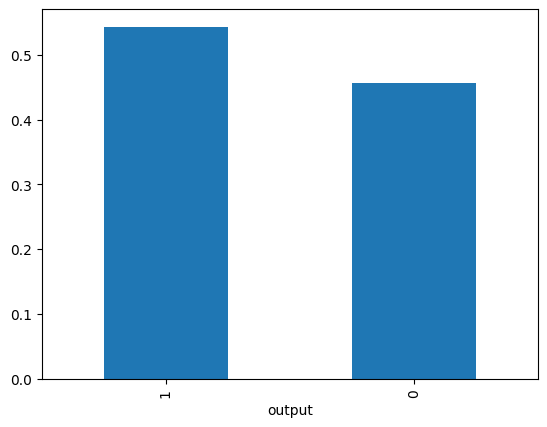

In [12]:
df['output'].value_counts(normalize=True).plot(kind='bar')
plt.show()
#checking for a significant imbalance in the target variable where presence of heart attack risk (1: Yes, 0: No)

In [13]:
df.groupby('sex').mean()
#Male: 0, Female: 1

,age,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
sex,,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.125000,0.572917,151.12500,0.229167,0.876042,1.427083,0.552083,2.125000,0.750000
1,53.834951,0.927184,130.912621,239.601942,0.160194,0.504854,148.84466,0.373786,1.120874,1.383495,0.796117,2.402913,0.446602


In [14]:
print(df)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  

Histograms for numerical features -> To measure frequency


In [15]:
# Dictionary mapping original names to proper names
proper_names = {
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'Chest Pain Type',
    'trtbps': 'Resting Blood Pressure',
    'fbs': 'Fasting Blood Sugar',
    'chol': 'Cholesterol',
    'restecg': 'Resting Electrocardiographic Results',
    'thalachh': 'Maximum Heart Rate Achieved',
    'exng': 'Exercise Induced Angina',
    'oldpeak': 'ST Depression' , # Induced by Exercise Relative to Rest',
    'slp': 'ST Segment',    #Slope of the Peak Exercise
    'caa': 'Number of Major Vessels', # Colored by Fluoroscopy
    'thall': 'Thalassemia',
    'output':'Heart Attack'
}

# Rename the columns in the DataFrame
df.rename(columns=proper_names, inplace=True)

# Print the DataFrame with renamed columns
print(df.head())

   Age  Sex  Chest Pain Type  Resting Blood Pressure  Cholesterol  \
0   63    1                3                     145          233   
1   37    1                2                     130          250   
2   41    0                1                     130          204   
3   56    1                1                     120          236   
4   57    0                0                     120          354   

   Fasting Blood Sugar  Resting Electrocardiographic Results  \
0                    1                                     0   
1                    0                                     1   
2                    0                                     0   
3                    0                                     1   
4                    0                                     1   

   Maximum Heart Rate Achieved  Exercise Induced Angina  ST Depression  \
0                          150                        0            2.3   
1                          187                      

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   302 non-null    int64  
 1   Sex                                   302 non-null    int64  
 2   Chest Pain Type                       302 non-null    int64  
 3   Resting Blood Pressure                302 non-null    int64  
 4   Cholesterol                           302 non-null    int64  
 5   Fasting Blood Sugar                   302 non-null    int64  
 6   Resting Electrocardiographic Results  302 non-null    int64  
 7   Maximum Heart Rate Achieved           302 non-null    int64  
 8   Exercise Induced Angina               302 non-null    int64  
 9   ST Depression                         302 non-null    float64
 10  ST Segment                            302 non-null    int64  
 11  Number of Major Vessels 

<Figure size 640x480 with 0 Axes>

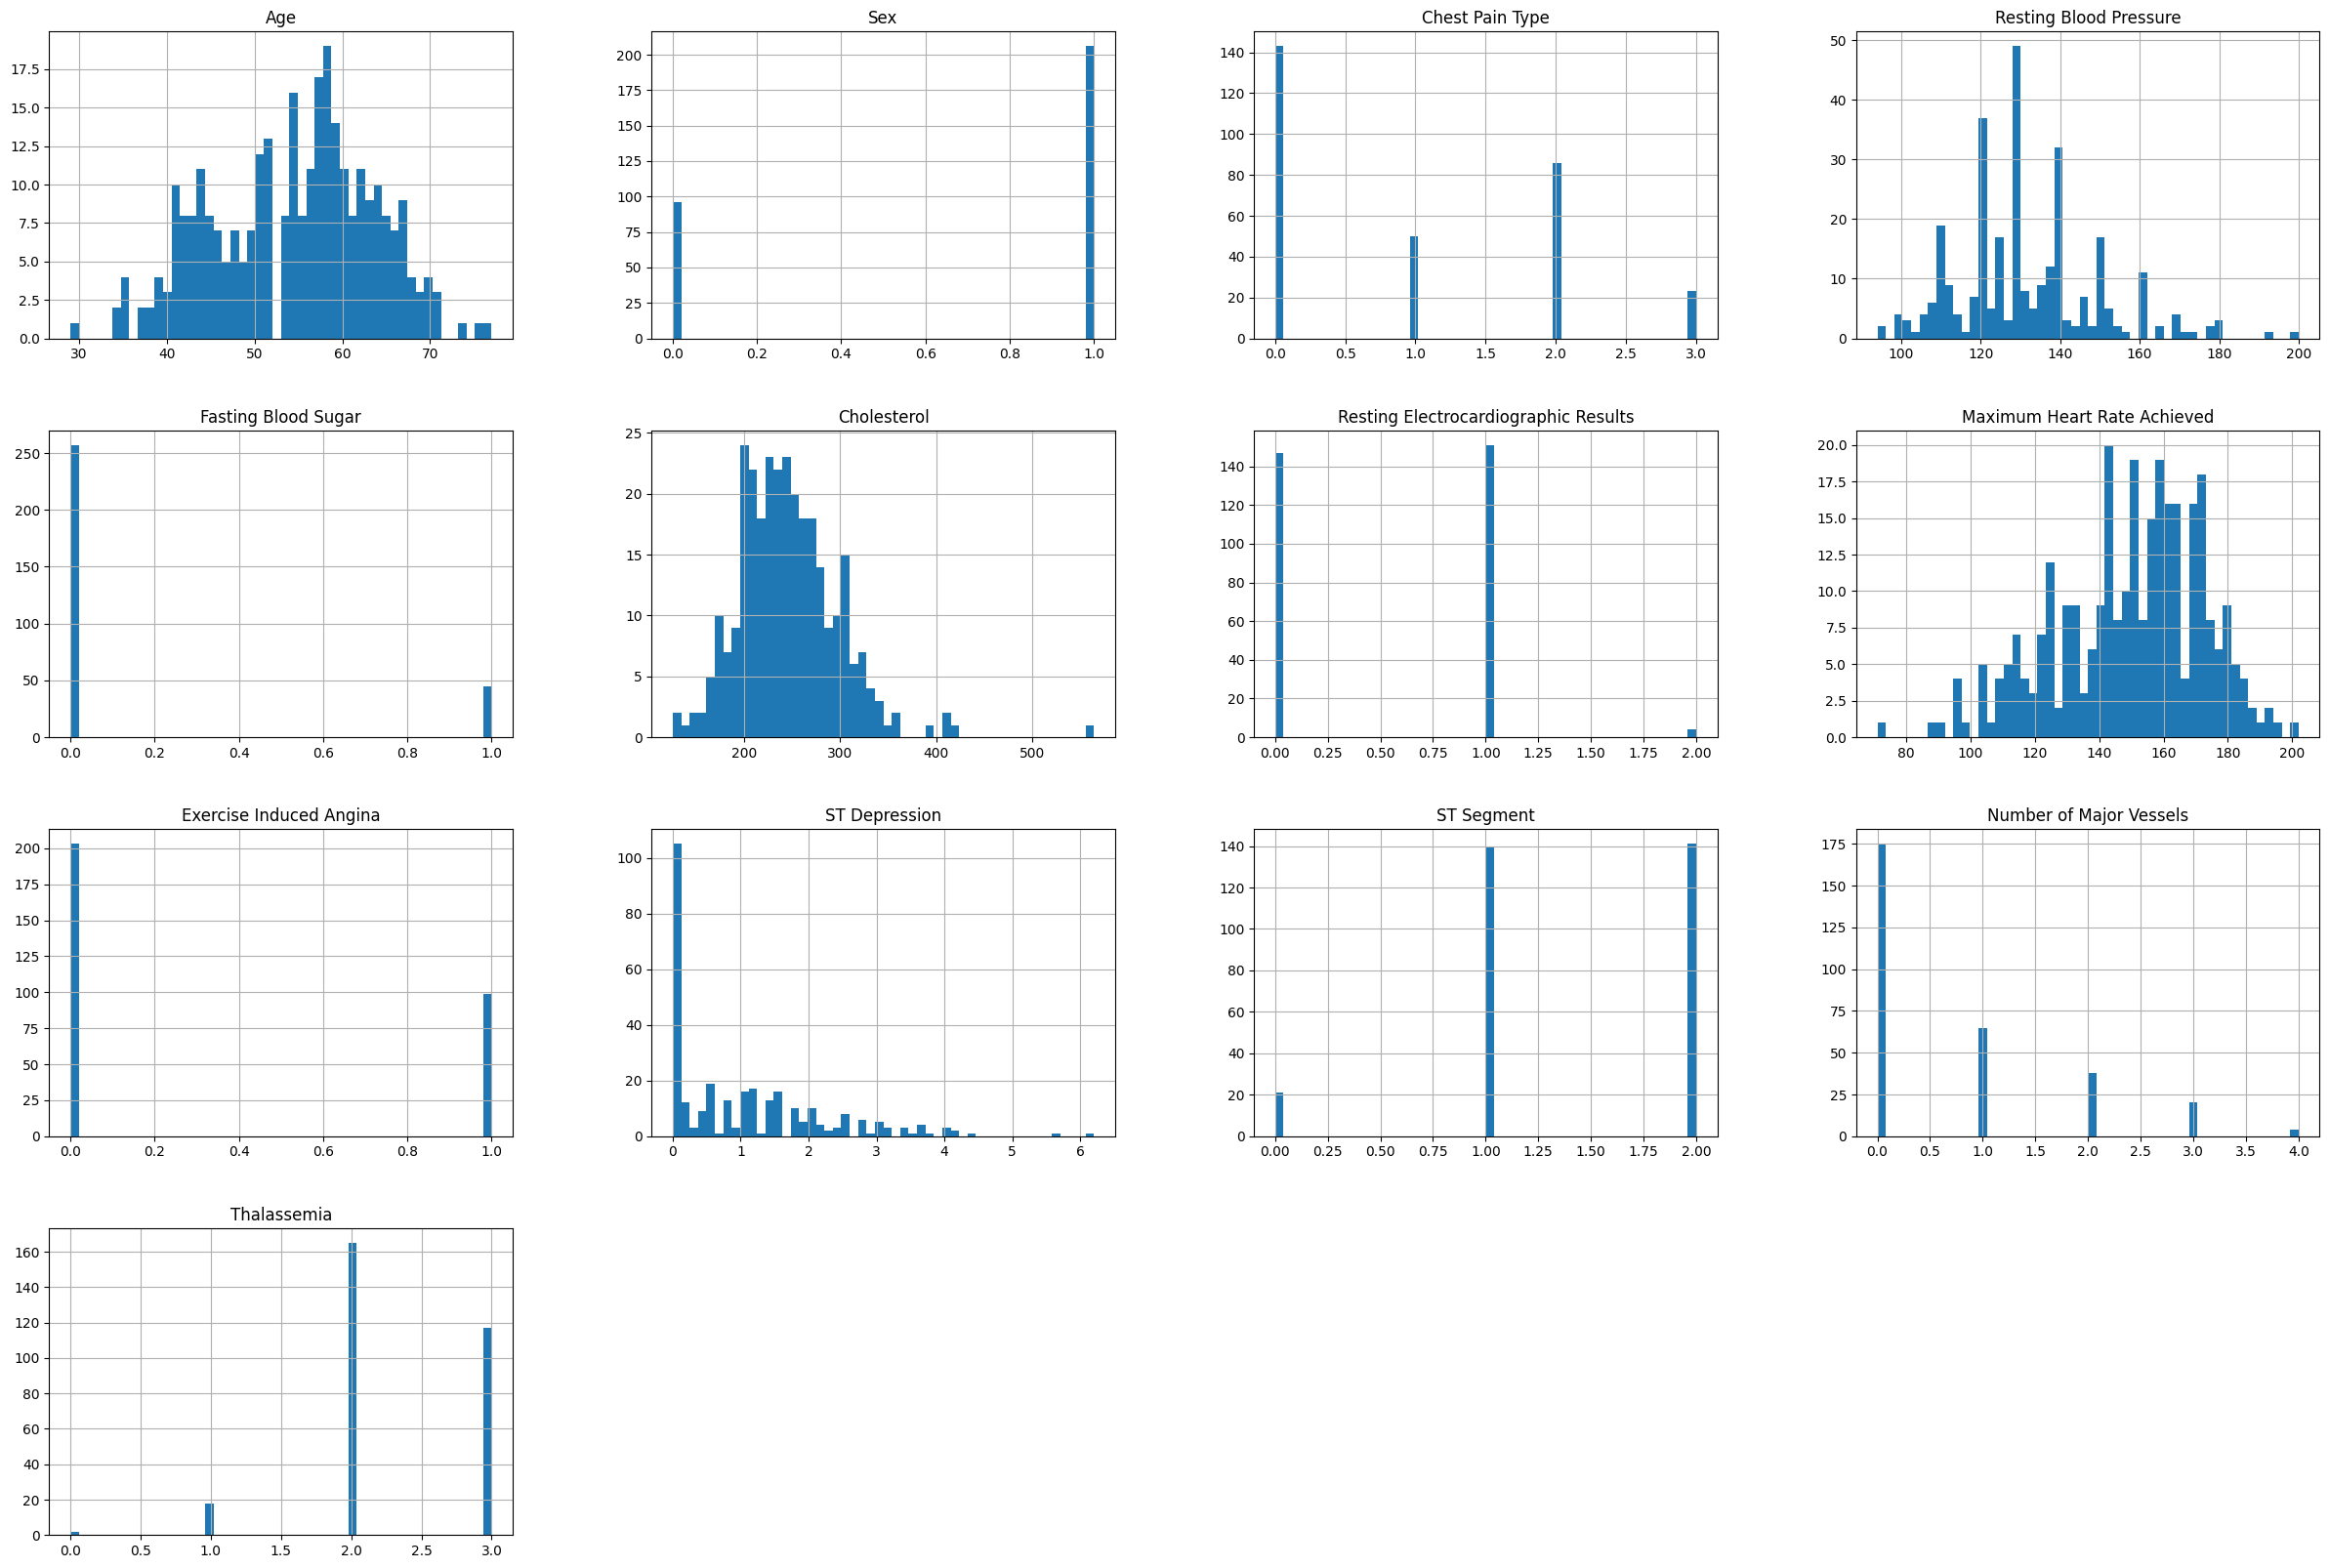

In [17]:
numerical_features = ['Age','Sex' , 'Chest Pain Type' ,'Resting Blood Pressure', 'Fasting Blood Sugar', 'Cholesterol',
                      'Resting Electrocardiographic Results' , 'Maximum Heart Rate Achieved','Exercise Induced Angina',
                      'ST Depression','ST Segment' , 'Number of Major Vessels', 'Thalassemia']


# Create histograms for numerical features
plt.suptitle('Histograms of Numerical Features', fontsize=16)
df[numerical_features].hist(bins=50, figsize=(30, 20))
plt.show()



Box Plots for Numerical Features -> To check for outliers

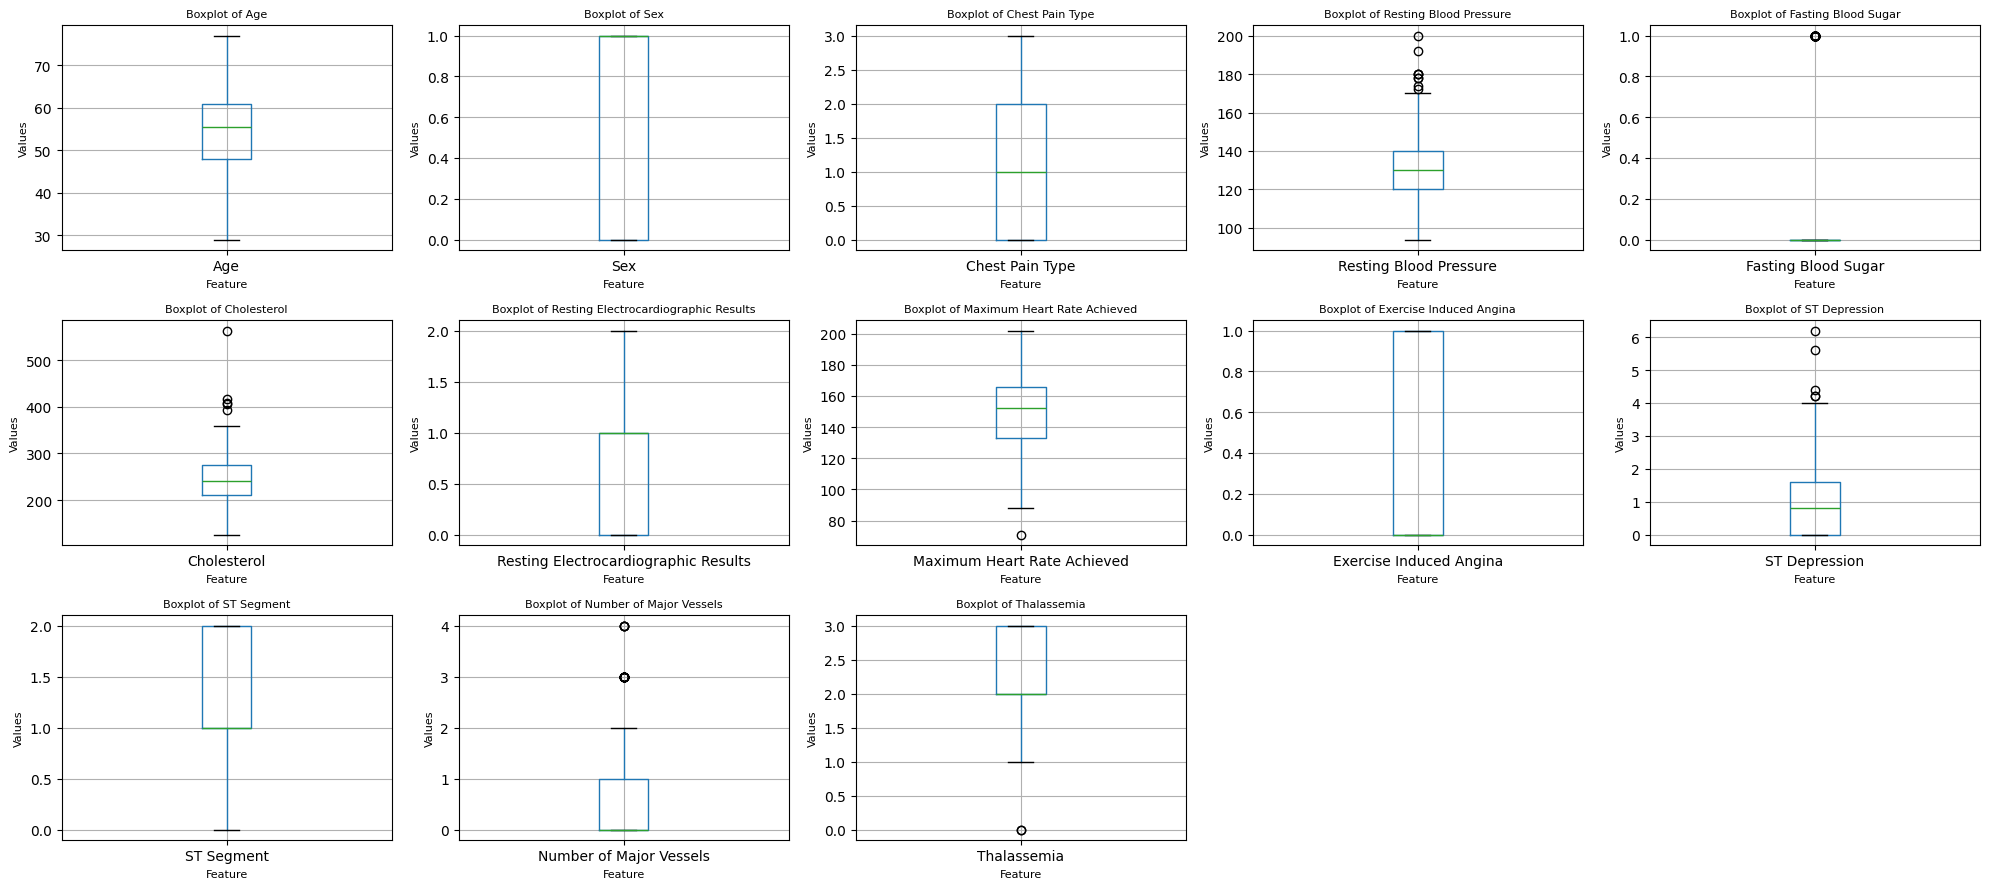

In [18]:
# Create boxplots for numerical features
num_cols = len(numerical_features)
num_rows = (num_cols + 4) // 5  # To ensure 5 boxplots per row
fig, axes = plt.subplots(num_rows, 5, figsize=(20, num_rows * 3))

# Remove the extra subplots if the number of features is not divisible by 5
if num_cols % 5 != 0:
    num_empty_subplots = 5 - (num_cols % 5)
    for i in range(num_empty_subplots):
        fig.delaxes(axes[num_rows-1, 4-i])

# Plot boxplots for each numerical feature
for i, feature in enumerate(numerical_features):
    row = i // 5
    col = i % 5
    df.boxplot(column=feature, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {feature}', fontsize=8)
    axes[row, col].set_ylabel('Values', fontsize=8)
    axes[row, col].set_xlabel('Feature', fontsize=8)
    axes[row, col].grid(True)

plt.tight_layout()
plt.show()


In [19]:
# Detect outliers and remove them from the DataFrame
df_no_outliers = df.copy()
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

# Print the shape of the original and filtered DataFrame to see the difference
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)


Original DataFrame shape: (302, 14)
DataFrame shape after removing outliers: (228, 14)


Scatter Plots for Numerical Features -> Visualizing the relationship between every two numerical features

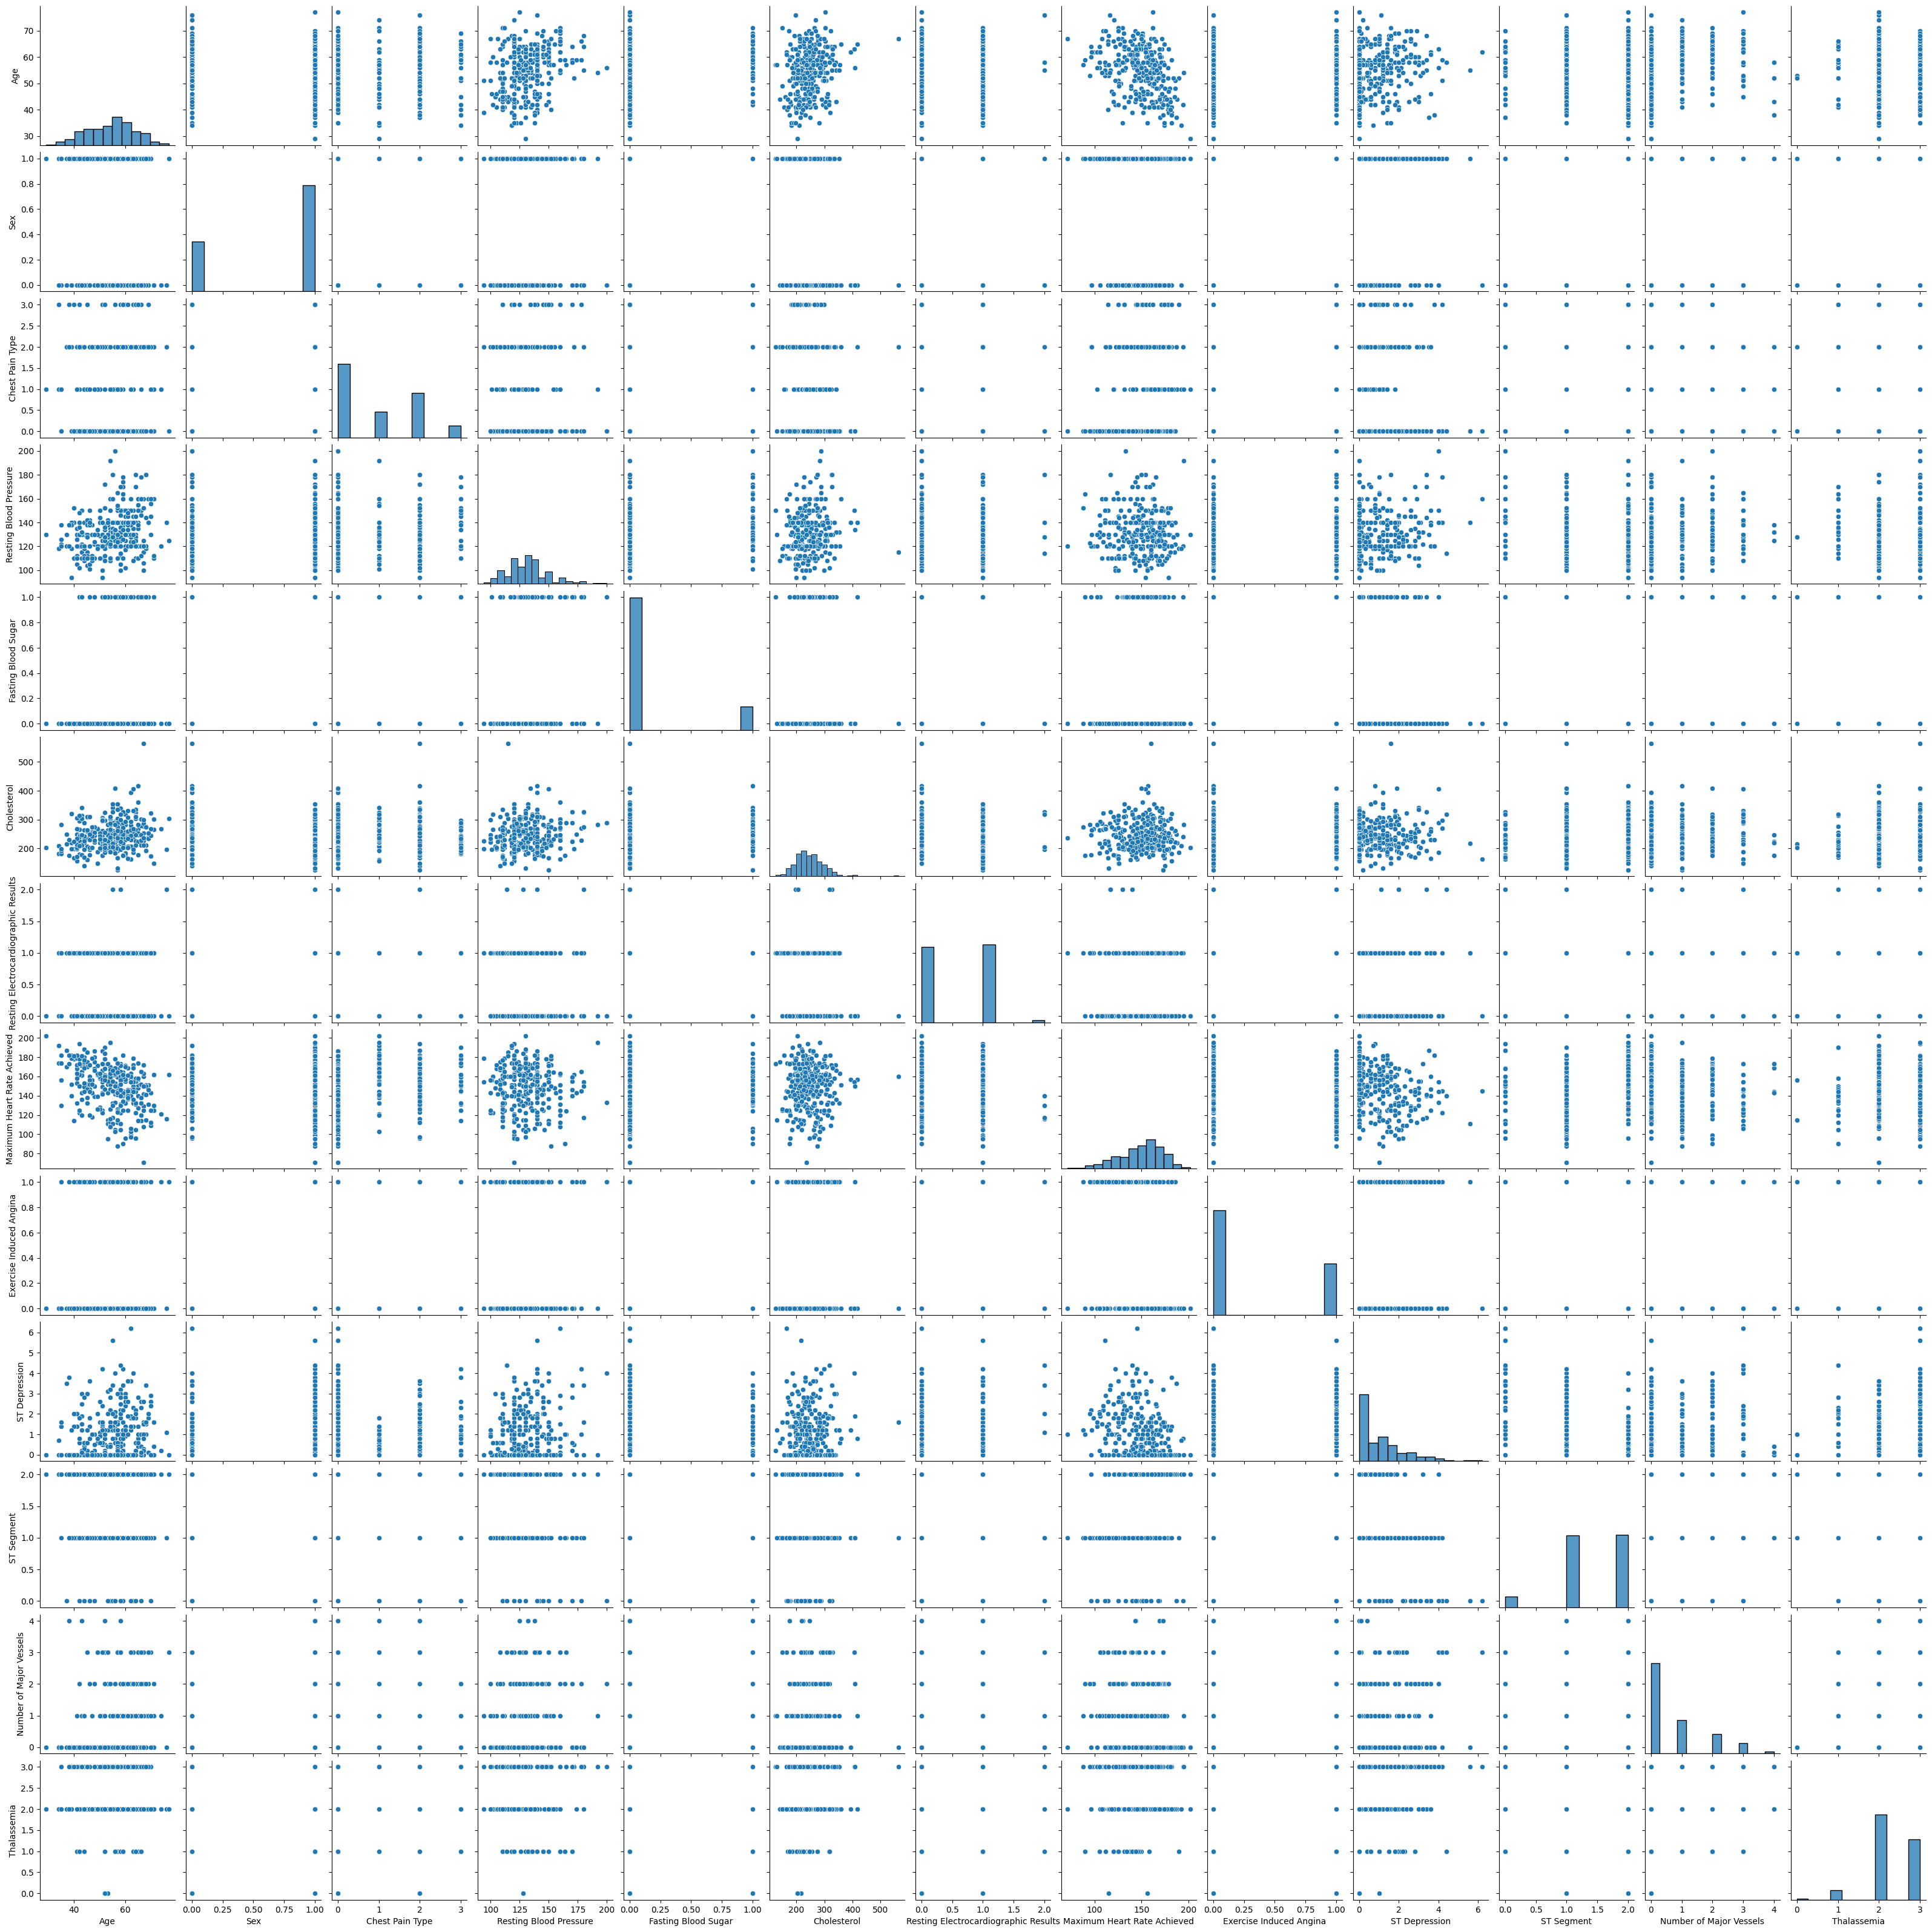

In [20]:
sns.pairplot(df[numerical_features], kind='scatter', diag_kind='hist')
plt.show()


Categorical Features -> Pie Charts

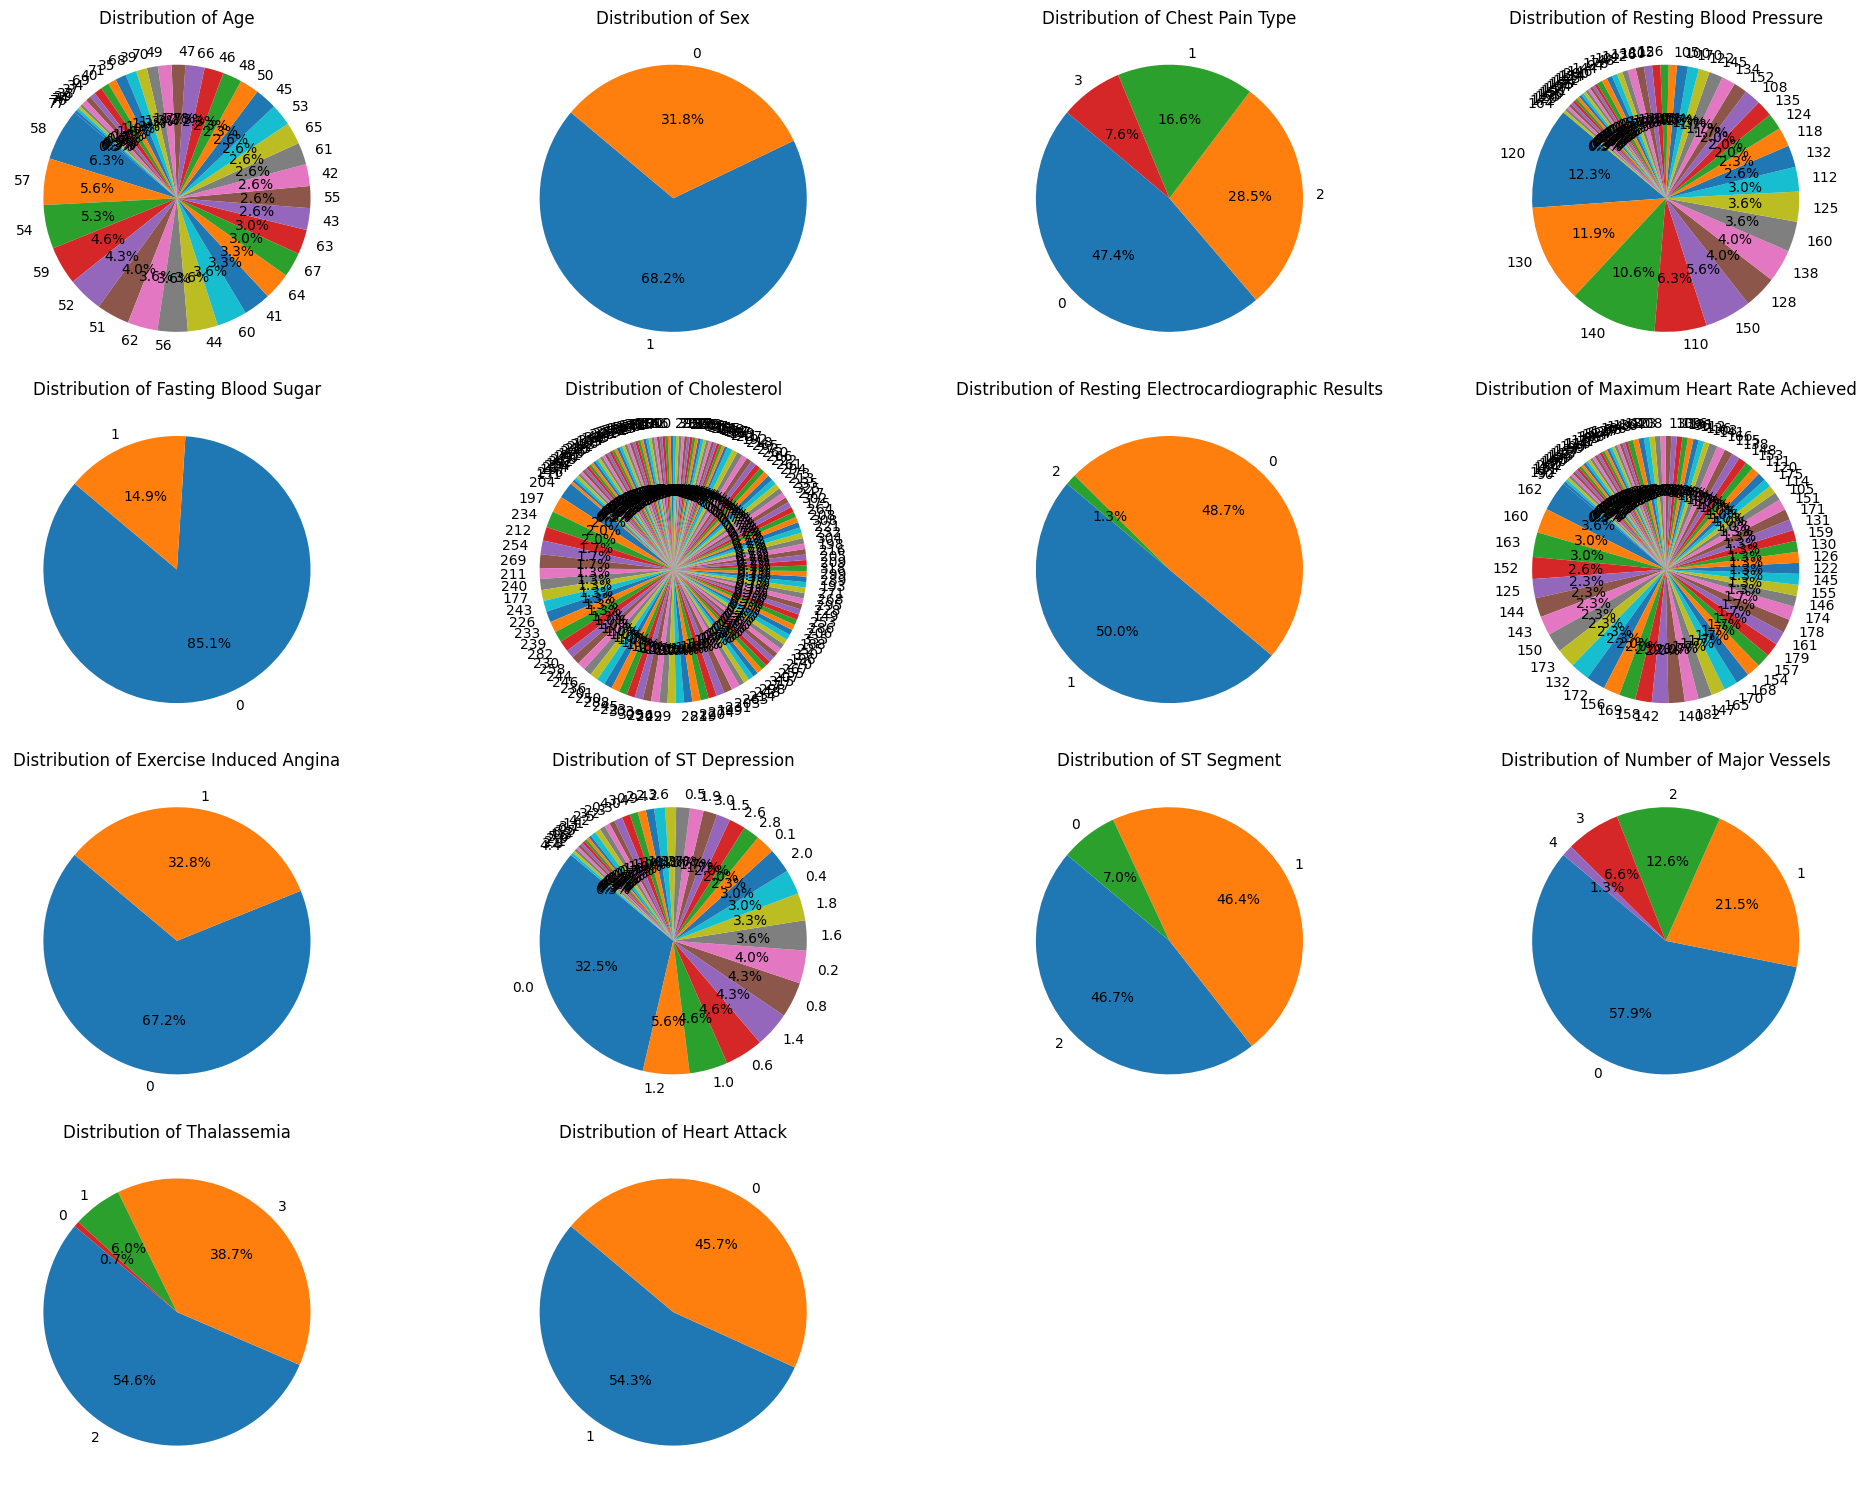

In [21]:
import math

cat_features = ['Age','Sex' , 'Chest Pain Type' ,'Resting Blood Pressure', 'Fasting Blood Sugar', 'Cholesterol',
                      'Resting Electrocardiographic Results' , 'Maximum Heart Rate Achieved','Exercise Induced Angina',
                      'ST Depression','ST Segment' , 'Number of Major Vessels', 'Thalassemia' ,'Heart Attack']

num_features = len(cat_features)
num_cols = 4  # Number of columns in the grid
num_rows = math.ceil(num_features / num_cols)  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

for i, feature in enumerate(cat_features):
    row = i // num_cols
    col = i % num_cols
    df[feature].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_ylabel('')
######
#  if feature == 'Smoking':
#        df[feature].replace({1: 'Smoker', 0: 'Non-smoker'}).value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=axes[row, col])
#     elif feature == 'Sex':
#       df[feature].replace({1: 'Female', 0: 'Male'}).value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=axes[row, col])
#     elif feature == 'Diet':
#       df[feature].replace({2: 'Unhealthy', 1: 'Average', 0: 'Healthy'}).value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=axes[row, col])
#     else: df[feature].replace({1: 'Yes', 0: 'No'}).value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=axes[row, col])
#     axes[row, col].set_title(f'Distribution of {feature}')
#     axes[row, col].set_ylabel('')


# Remove empty subplots
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


Pair Plot for All Features

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   302 non-null    int64  
 1   Sex                                   302 non-null    int64  
 2   Chest Pain Type                       302 non-null    int64  
 3   Resting Blood Pressure                302 non-null    int64  
 4   Cholesterol                           302 non-null    int64  
 5   Fasting Blood Sugar                   302 non-null    int64  
 6   Resting Electrocardiographic Results  302 non-null    int64  
 7   Maximum Heart Rate Achieved           302 non-null    int64  
 8   Exercise Induced Angina               302 non-null    int64  
 9   ST Depression                         302 non-null    float64
 10  ST Segment                            302 non-null    int64  
 11  Number of Major Vessels 

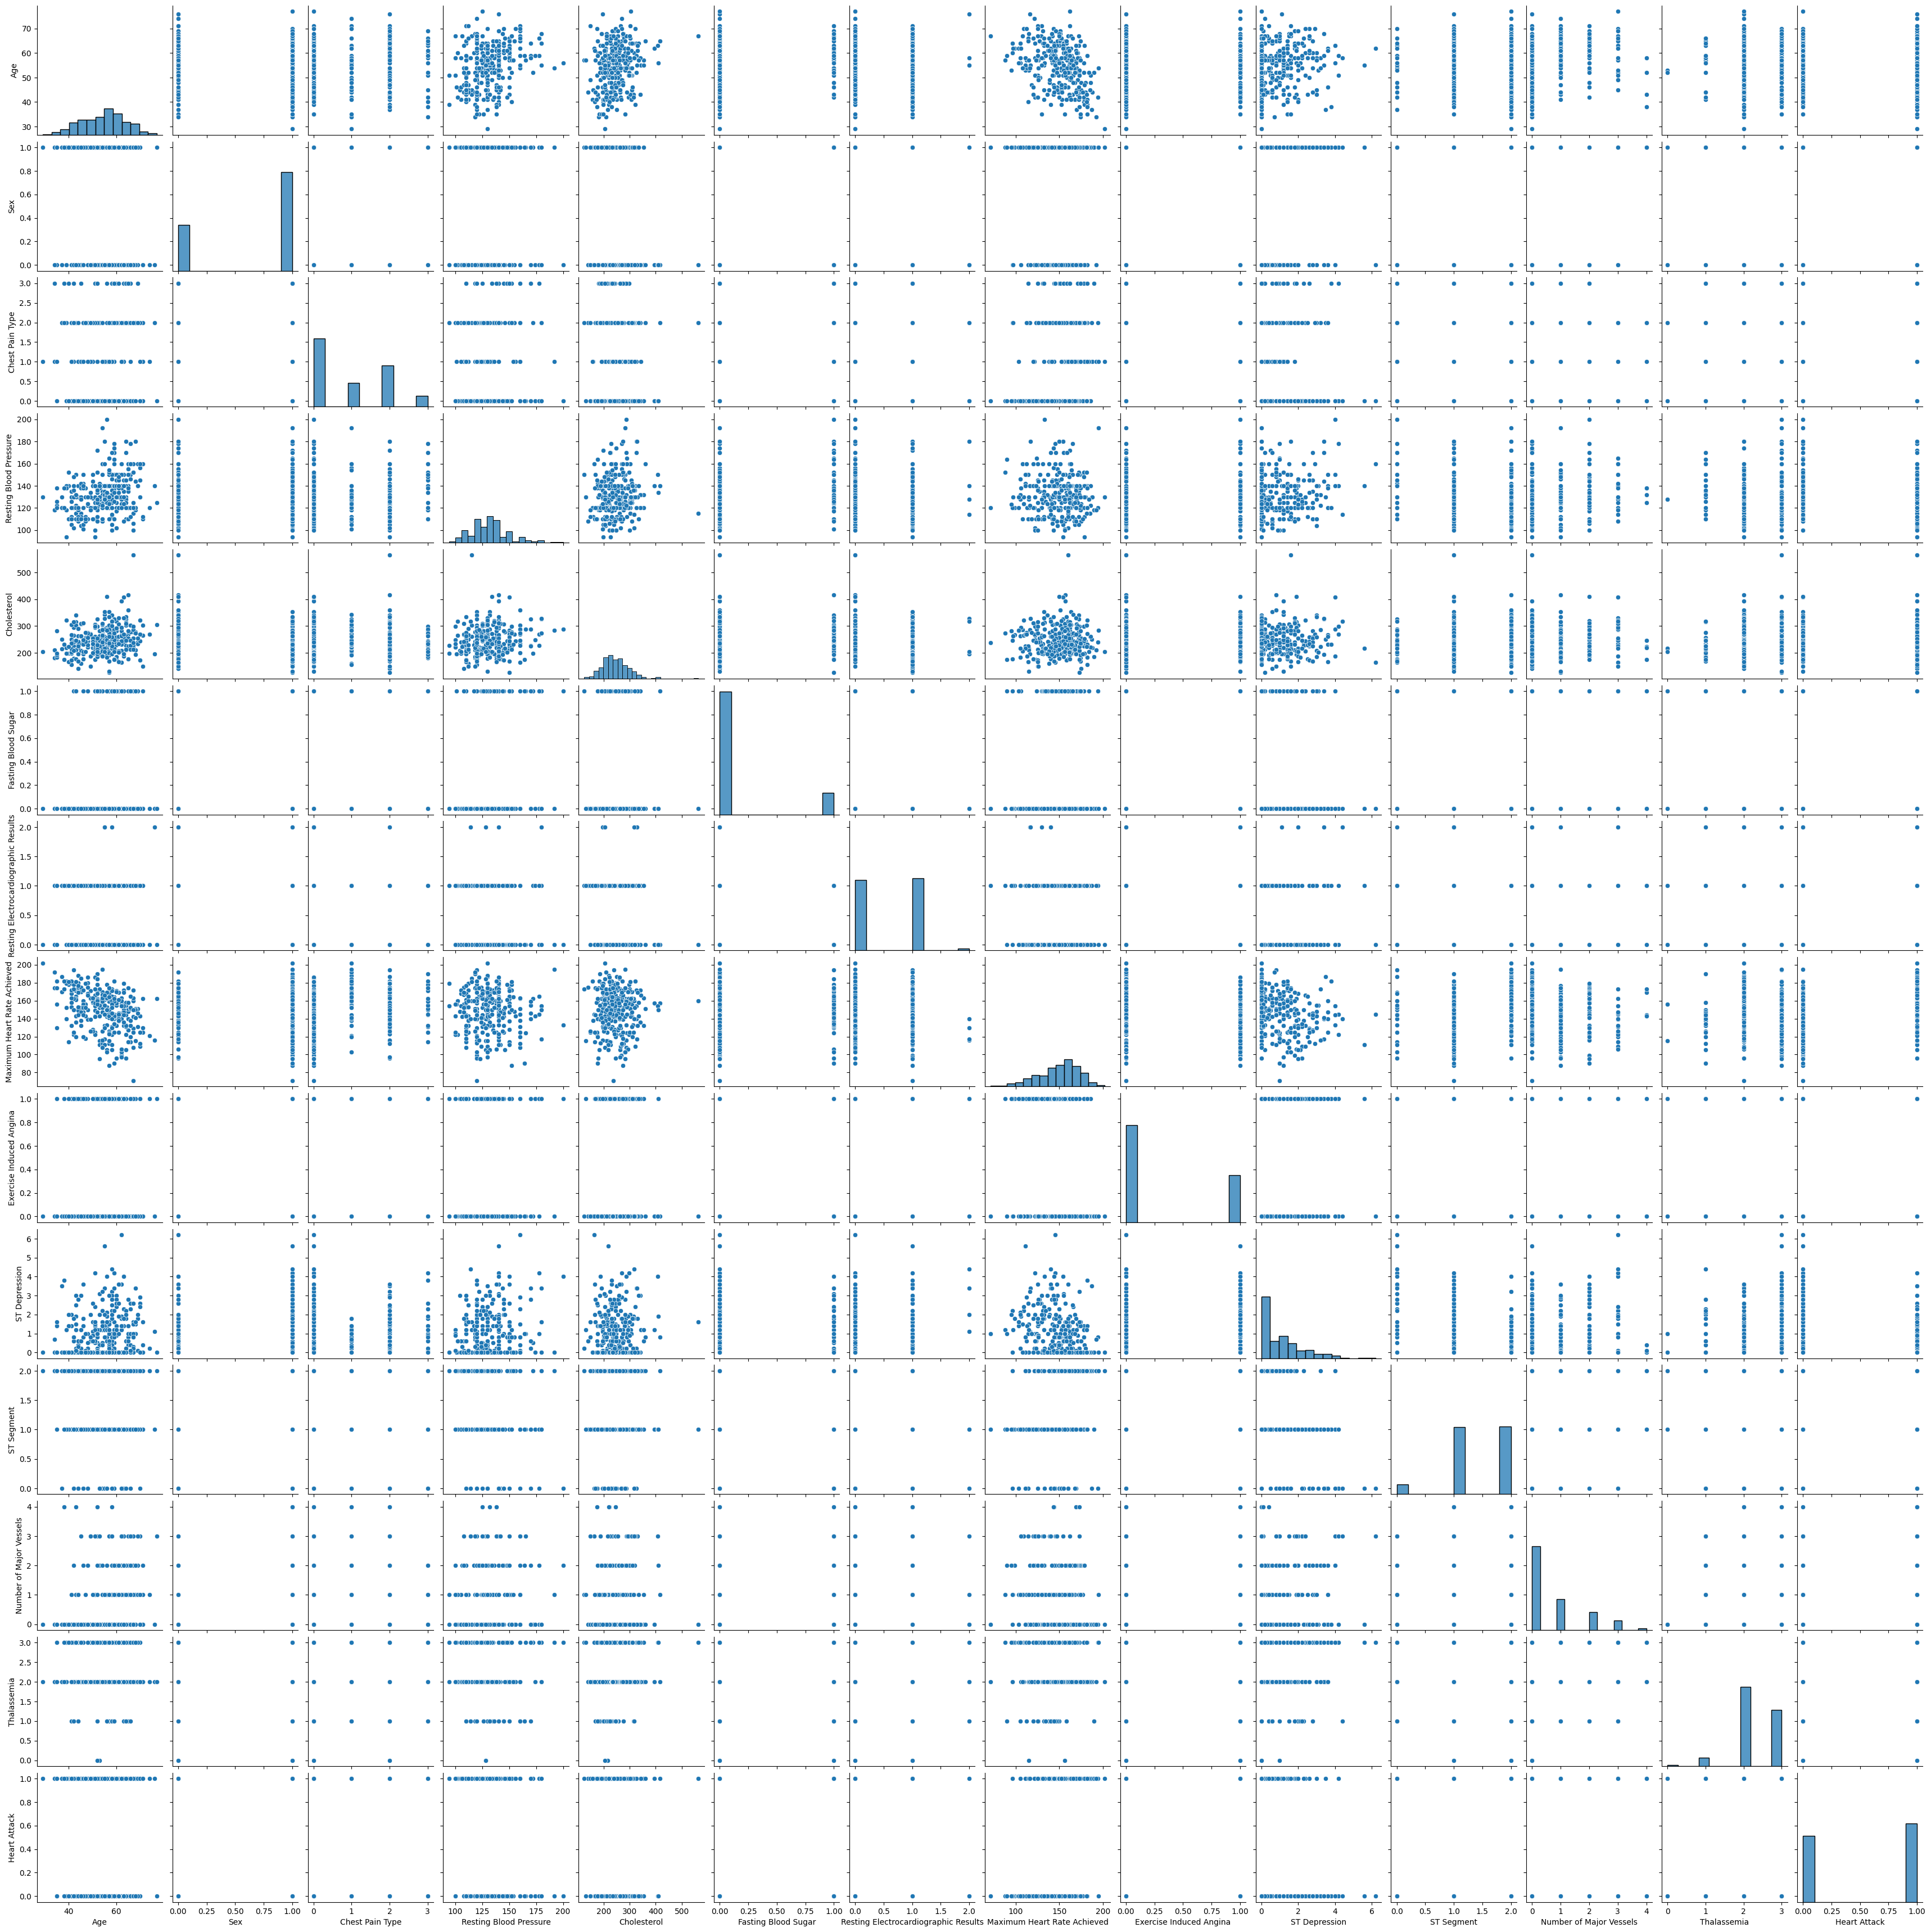

In [23]:
import seaborn as sns

sns.pairplot(df)
plt.show()

In [24]:
print(df)

     Age  Sex  Chest Pain Type  Resting Blood Pressure  Cholesterol  \
0     63    1                3                     145          233   
1     37    1                2                     130          250   
2     41    0                1                     130          204   
3     56    1                1                     120          236   
4     57    0                0                     120          354   
..   ...  ...              ...                     ...          ...   
298   57    0                0                     140          241   
299   45    1                3                     110          264   
300   68    1                0                     144          193   
301   57    1                0                     130          131   
302   57    0                1                     130          236   

     Fasting Blood Sugar  Resting Electrocardiographic Results  \
0                      1                                     0   
1              

**Modelling**

In [25]:
#splitting the dataset features into X and y variables
X = df.drop(columns=['Heart Attack'])  # Features
y = df['Heart Attack']  # Target variable

In [26]:
X.info()


<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   302 non-null    int64  
 1   Sex                                   302 non-null    int64  
 2   Chest Pain Type                       302 non-null    int64  
 3   Resting Blood Pressure                302 non-null    int64  
 4   Cholesterol                           302 non-null    int64  
 5   Fasting Blood Sugar                   302 non-null    int64  
 6   Resting Electrocardiographic Results  302 non-null    int64  
 7   Maximum Heart Rate Achieved           302 non-null    int64  
 8   Exercise Induced Angina               302 non-null    int64  
 9   ST Depression                         302 non-null    float64
 10  ST Segment                            302 non-null    int64  
 11  Number of Major Vessels 

In [27]:
y.shape

(302,)

Synthetic Minority Oversampling (SMOTE) -> ending the imbalance in the target feature's values

In [28]:
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
os = SMOTE(random_state=0)
X_os,y_os=os.fit_resample(X,y)

In [ ]:
X_os.shape

(328, 13)

In [ ]:
y_os.shape

(328,)

In [ ]:
y_os.value_counts()

Heart Attack
1    164
0    164
Name: count, dtype: int64

In [ ]:
#dataframe with oversampled entries
df_os=pd.DataFrame(X_os)
df_os['Heart Attack Risk'] = y_os

Train & Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_os, y_os, test_size=0.3, random_state=0)

Standardizing the data

In [ ]:
X.describe()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting Electrocardiographic Results,Maximum Heart Rate Achieved,Exercise Induced Angina,ST Depression,ST Segment,Number of Major Vessels,Thalassemia
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [ ]:
sc_train = StandardScaler().fit(X_train)
X_train_sc = sc_train.transform(X_train)

In [ ]:
#snapshot of the transformed data
np.set_printoptions(precision=3)
print(X_train_sc[0:5,:])

[[ 0.916  0.664 -0.855 -0.097  1.588  2.679 -0.939 -0.65   1.378  0.734
   1.078  2.432  1.092]
 [-0.219  0.664  1.083 -0.097 -0.907  2.679 -0.939  0.201 -0.726  0.173
  -2.474 -0.72  -0.481]
 [ 0.235  0.664  0.114 -0.443  0.294 -0.373  0.964 -0.267 -0.726 -0.669
   1.078 -0.72   1.092]
 [ 0.462  0.664 -0.855  0.192 -0.213 -0.373  0.964  0.584 -0.726 -0.482
  -0.698 -0.72   1.092]
 [-1.24   0.664  1.083  0.481 -0.194 -0.373 -0.939  1.393 -0.726 -0.949
   1.078 -0.72  -0.481]]


Training The Model

In [ ]:
model_lr = LogisticRegression(solver='liblinear')

In [ ]:
model_lr.fit(X_train_sc, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
sc_test=StandardScaler().fit(X_test)
X_test_sc=sc_test.transform(X_test)

In [ ]:
results=model_lr.score(X_test_sc,y_test)
results*100

82.82828282828282

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   302 non-null    int64  
 1   Sex                                   302 non-null    int64  
 2   Chest Pain Type                       302 non-null    int64  
 3   Resting Blood Pressure                302 non-null    int64  
 4   Cholesterol                           302 non-null    int64  
 5   Fasting Blood Sugar                   302 non-null    int64  
 6   Resting Electrocardiographic Results  302 non-null    int64  
 7   Maximum Heart Rate Achieved           302 non-null    int64  
 8   Exercise Induced Angina               302 non-null    int64  
 9   ST Depression                         302 non-null    float64
 10  ST Segment                            302 non-null    int64  
 11  Number of Major Vessels 

<Axes: title={'center': 'Correlation with target feature'}>

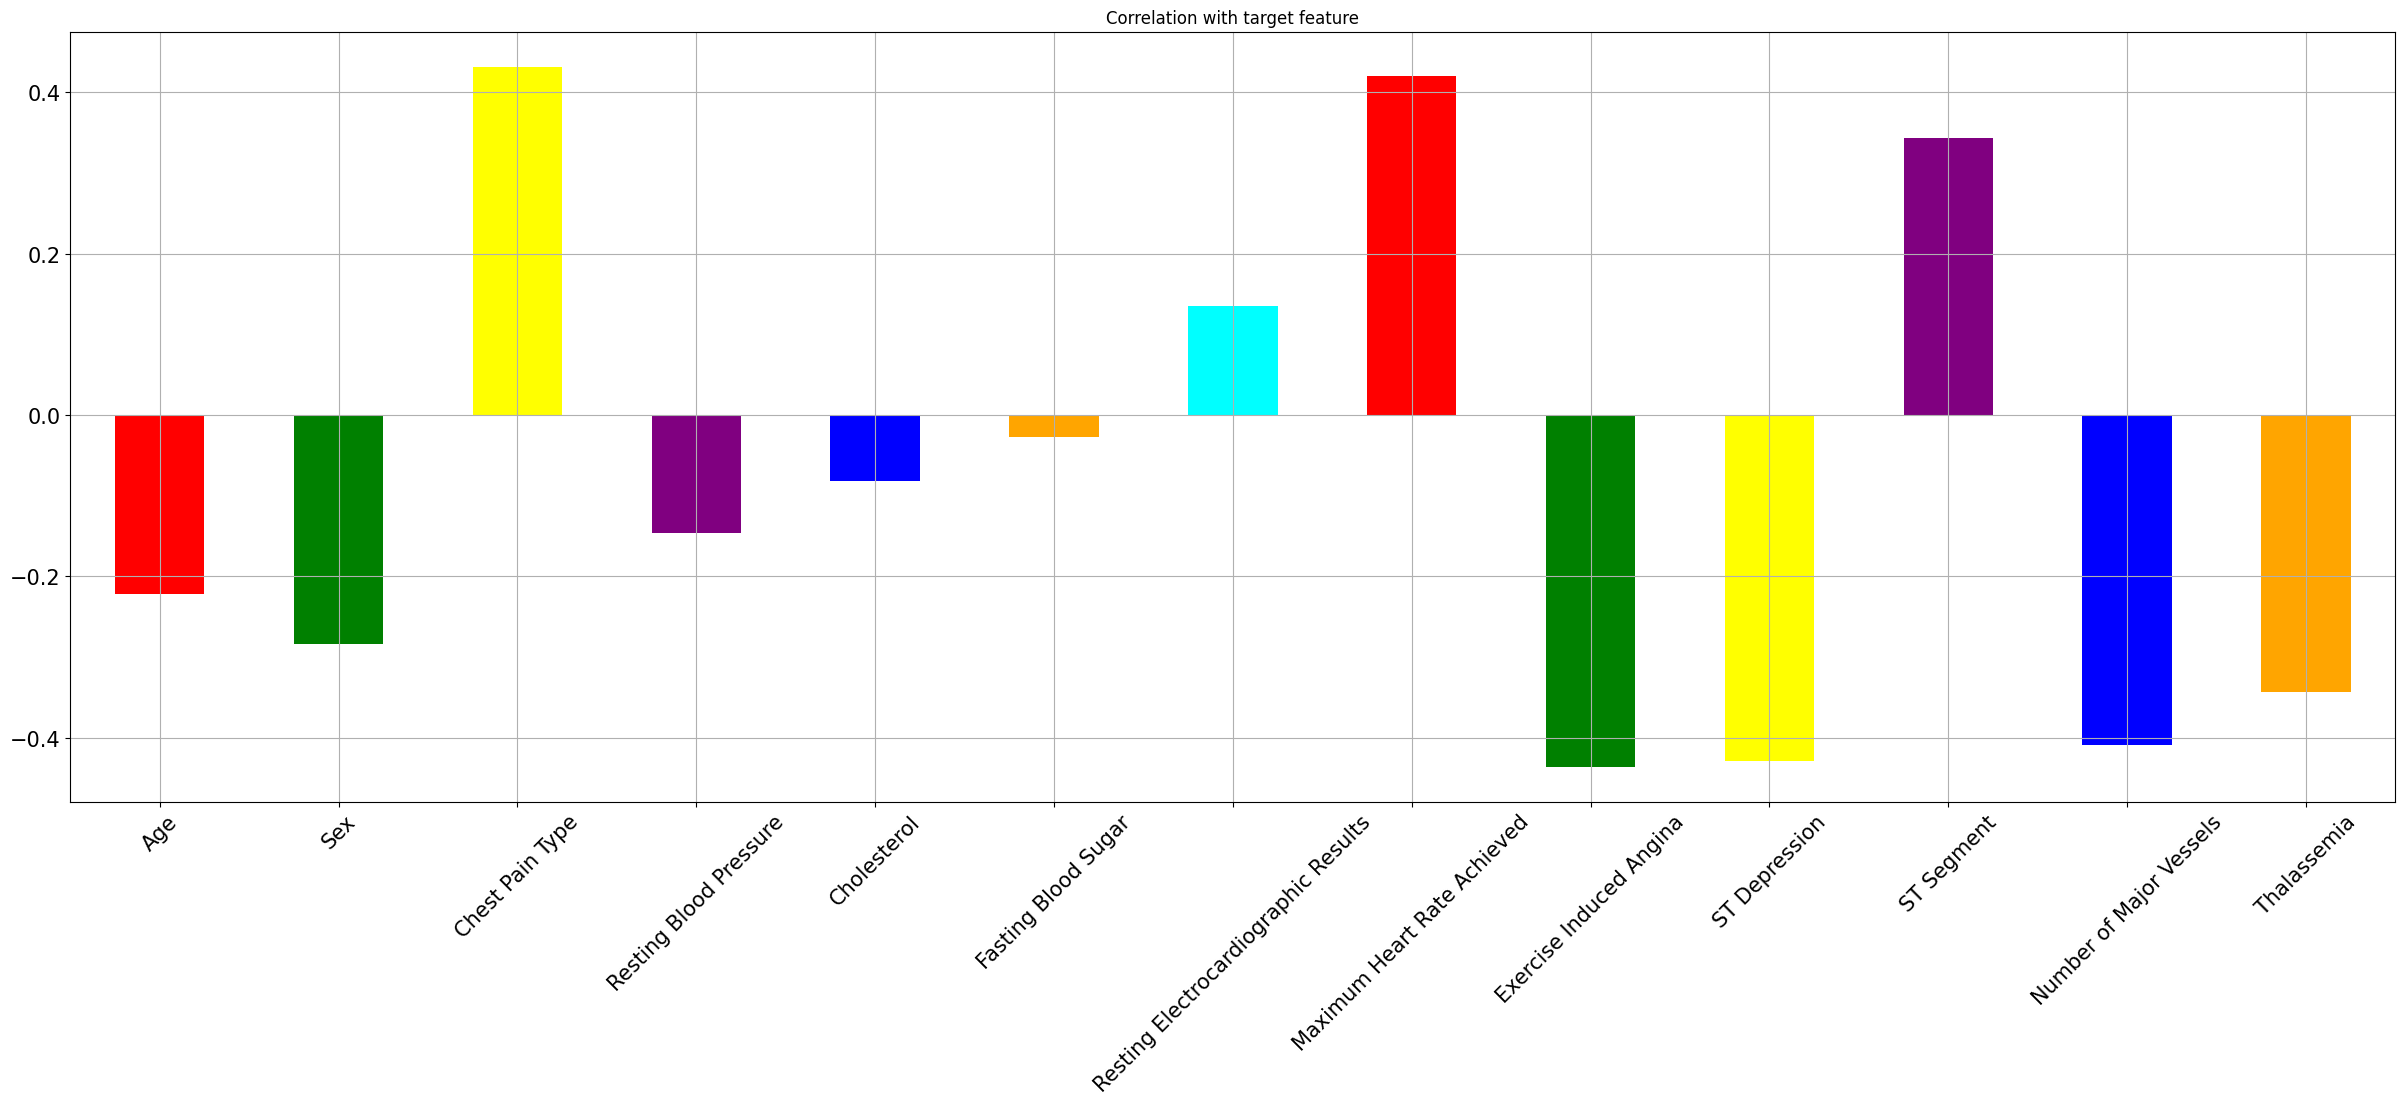

In [ ]:
c=['red','green','yellow','purple','blue','orange','cyan']
X.info()
X.corrwith(df['Heart Attack']).plot.bar(figsize=(30,10),title='Correlation with target feature',fontsize=15,rot=45,grid=True,color=c)

In [ ]:
print(df)

     Age  Sex  Chest Pain Type  Resting Blood Pressure  Cholesterol  \
0     63    1                3                     145          233   
1     37    1                2                     130          250   
2     41    0                1                     130          204   
3     56    1                1                     120          236   
4     57    0                0                     120          354   
..   ...  ...              ...                     ...          ...   
298   57    0                0                     140          241   
299   45    1                3                     110          264   
300   68    1                0                     144          193   
301   57    1                0                     130          131   
302   57    0                1                     130          236   

     Fasting Blood Sugar  Resting Electrocardiographic Results  \
0                      1                                     0   
1              

# Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
## generate instancces of kfold logistics regression algorithm
kfold=KFold(n_splits=10,random_state=7,shuffle=True)
lr_2=LogisticRegression(solver='liblinear')

In [ ]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)

In [ ]:
##train the logistic regression Model w/Kfold cross validationn and get the scores
results= cross_val_score (lr_2 ,X_train_sc ,y_train,cv=kfold)
results

array([0.739, 0.739, 0.739, 0.783, 0.87 , 0.87 , 0.783, 0.826, 0.957,
       0.864])

In [ ]:
 ## generate average accuracy
 results.mean()*100,results.std()*100

(81.6798418972332, 6.91420045143627)

In [ ]:
# Logiistic Reression and CV with log loss metric
# we can use other scpring else than defualt scoring
kfold=KFold(n_splits=10 , random_state=7 ,shuffle=True)
lr_3=LogisticRegression(solver='liblinear')
results= cross_val_score (lr_3 ,X_train_sc ,y_train,cv=kfold , scoring='neg_log_loss')
results.mean() , results.std()

(-0.38897066791284785, 0.11956038090280928)

In [ ]:
#Logistic regression with AUc metric
# not a good to get score
kfold=KFold(n_splits=10 , random_state=7 ,shuffle=True)
lr_4=LogisticRegression(solver='liblinear')
results= cross_val_score (lr_4 ,X_train_sc ,y_train,cv=kfold , scoring='roc_auc')
results.mean() , results.std()

(0.9049397130647131, 0.05026407501801808)

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

<Axes: >

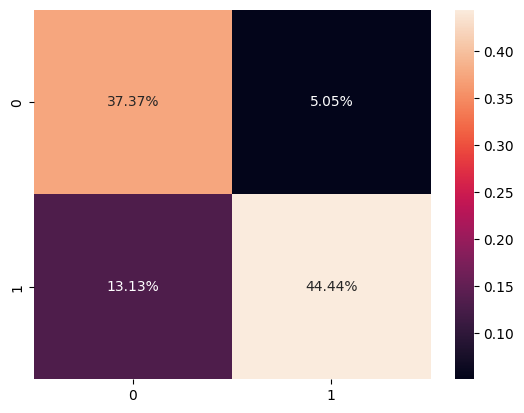

In [ ]:
pred_y = model_lr.predict(X_test_sc)
matrix= confusion_matrix(y_test , pred_y)
sns.heatmap(matrix/np.sum(matrix) , fmt='.2%' ,annot=True)

In [ ]:
## classification REport
## it gives precision , recall , f1 score and support
## along with accuracy , macro and weighted avg

report= classification_report(y_test,pred_y)
print(report)


              precision    recall  f1-score   support

           0       0.75      0.90      0.82        42
           1       0.92      0.77      0.84        57

    accuracy                           0.83        99
   macro avg       0.83      0.84      0.83        99
weighted avg       0.84      0.83      0.83        99



In [ ]:
# ### List of Features
features = list(df.keys())

# Exclude "Heart Attack" from features if present
if 'Heart Attack' in features:
    features.remove('Heart Attack')

features

['Age',
 'Sex',
 'Chest Pain Type',
 'Resting Blood Pressure',
 'Cholesterol',
 'Fasting Blood Sugar',
 'Resting Electrocardiographic Results',
 'Maximum Heart Rate Achieved',
 'Exercise Induced Angina',
 'ST Depression',
 'ST Segment',
 'Number of Major Vessels',
 'Thalassemia']

In [ ]:
### listt of coefficients
coefficients = model_lr.coef_
coefficients

array([[ 0.033, -0.923,  0.883, -0.643, -0.199,  0.114,  0.18 ,  0.602,
        -0.1  , -0.602,  0.461, -1.266, -0.299]])

In [ ]:
## list of coeff from model . convert to list
coefficients = coefficients.ravel().tolist()
coefficients

[0.033249398301760436,
 -0.9231446980071388,
 0.8830550104822893,
 -0.642864076494205,
 -0.1990940827316013,
 0.11447298328347384,
 0.18049232485984787,
 0.6024549450681371,
 -0.10022163050304214,
 -0.6017378002273582,
 0.46140281980242764,
 -1.2658384246822123,
 -0.29924652534063984]

In [ ]:
## table of co efficients and features

df= {"Features" : features ,
     "Coefficients":coefficients}

coeff_table = pd.DataFrame(df)
coeff_table=coeff_table.sort_values(by='Coefficients')
coeff_table

,Features,Coefficients
11,Number of Major Vessels,-1.265838
1,Sex,-0.923145
3,Resting Blood Pressure,-0.642864
9,ST Depression,-0.601738
12,Thalassemia,-0.299247
4,Cholesterol,-0.199094
8,Exercise Induced Angina,-0.100222
0,Age,0.033249
5,Fasting Blood Sugar,0.114473
6,Resting Electrocardiographic Results,0.180492


 # Confusion Matrix

Average Accuracy: 0.8167984189723321
Standard Deviation of Accuracy: 0.0691420045143627
              precision    recall  f1-score   support

           0       0.74      0.88      0.80        42
           1       0.90      0.77      0.83        57

    accuracy                           0.82        99
   macro avg       0.82      0.83      0.82        99
weighted avg       0.83      0.82      0.82        99



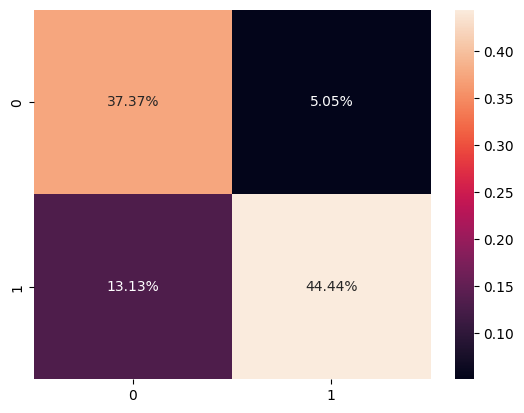

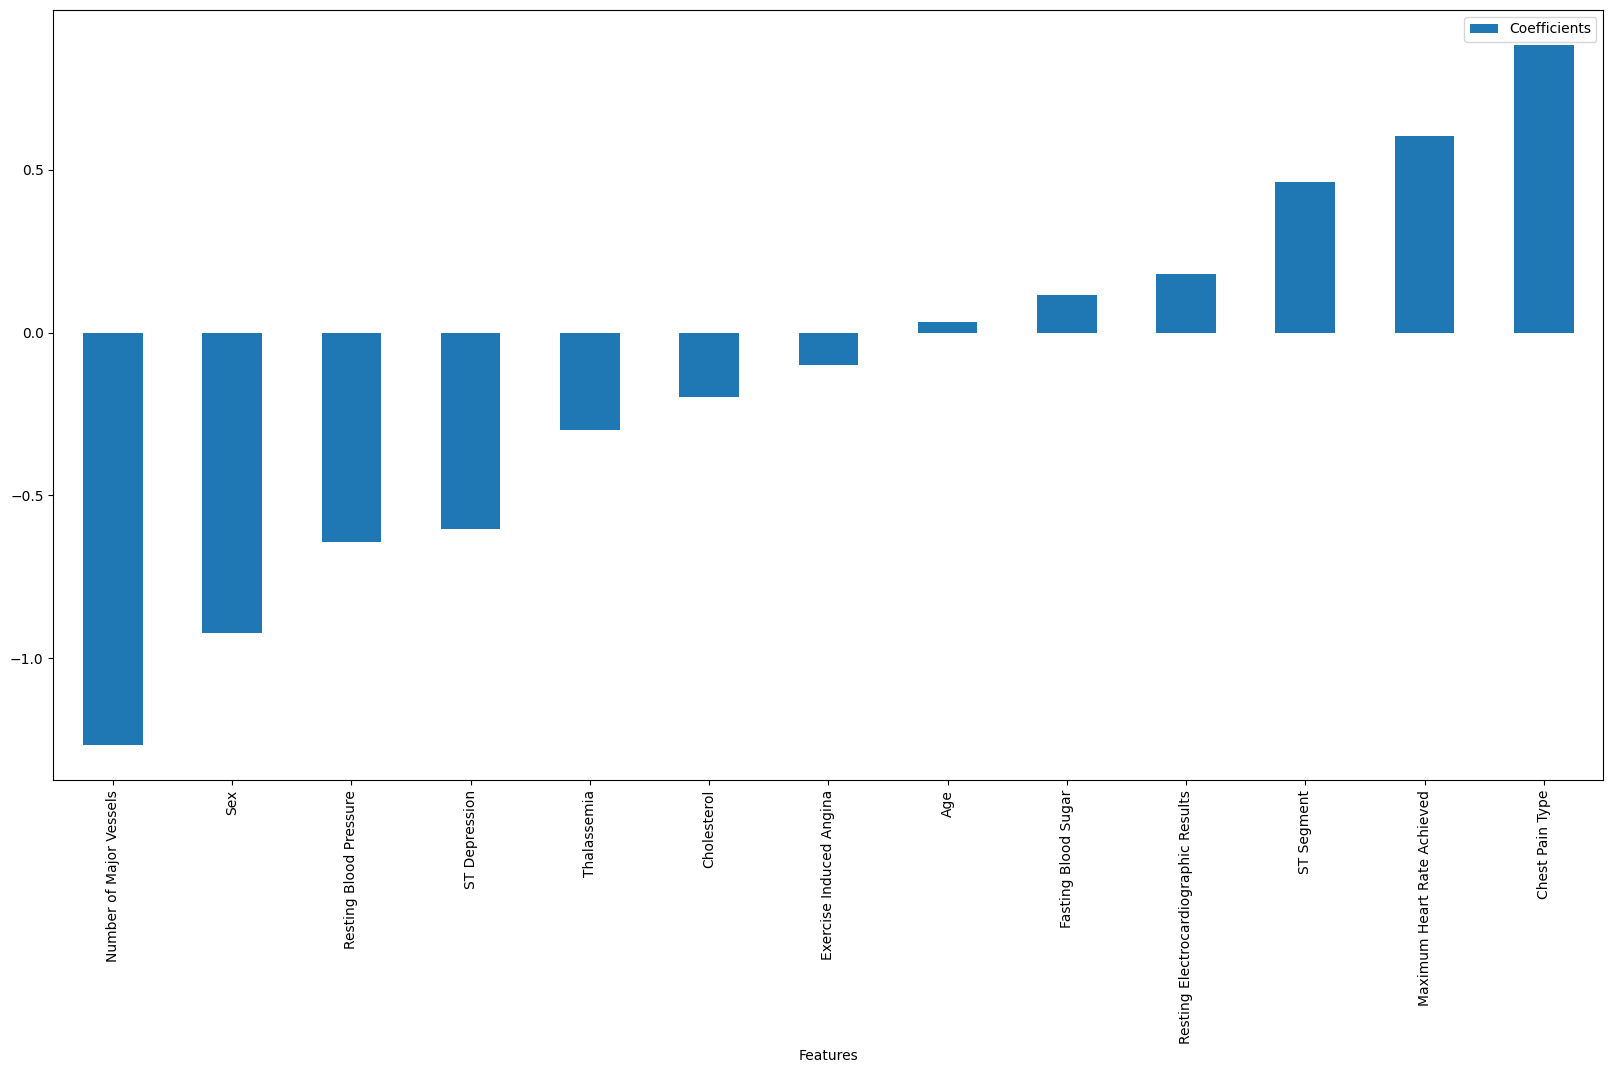

In [ ]:
# Cross-validation scores
results = cross_val_score(model_lr, X_train_sc, y_train, cv=kfold)
print("Average Accuracy:", results.mean())
print("Standard Deviation of Accuracy:", results.std())

# Train the logistic regression model
model_lr.fit(X_train_sc, y_train)

# Predictions on the test set
X_test_sc = scaler.transform(X_test)  # Scale test set
pred_y = model_lr.predict(X_test_sc)

# Confusion matrix
matrix = confusion_matrix(y_test, pred_y)
sns.heatmap(matrix / np.sum(matrix), fmt='.2%', annot=True)

# Classification report
report = classification_report(y_test, pred_y)
print(report)

# Feature coefficients
features = list(X.columns)
coefficients = model_lr.coef_.ravel().tolist()

# Table of coefficients and features
coeff_table = pd.DataFrame({'Features': features, 'Coefficients': coefficients})
coeff_table = coeff_table.sort_values(by='Coefficients')

# Plot of coefficients
coeff_table.plot(kind='bar', x='Features', y='Coefficients', figsize=(20, 10))
plt.show()

# MAE and RMSE


Accuracy: 0.8181818181818182
Precision: 0.8979591836734694
Recall: 0.7719298245614035
F1 Score: 0.8301886792452831


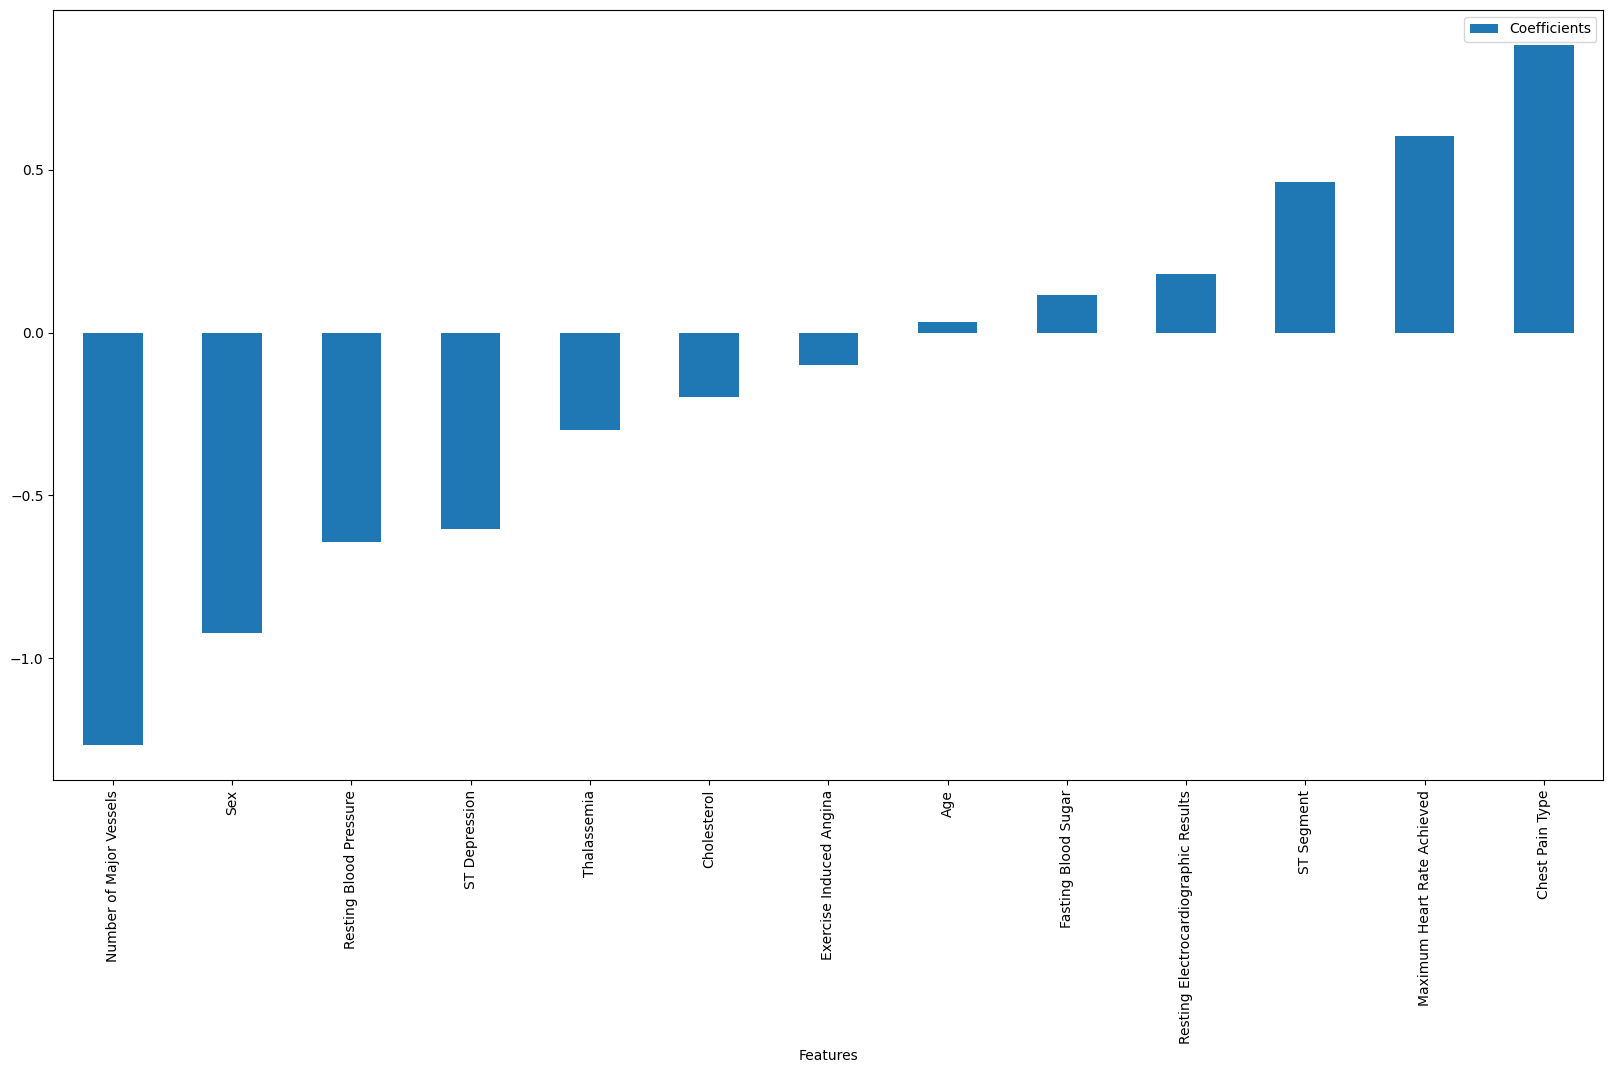

Mean Absolute Error (MAE): 0.18181818181818182
Root Mean Squared Error (RMSE): 0.4264014327112209
Silhouette Score: 0.15021159182073893


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, silhouette_score
from sklearn.cluster import KMeans

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, pred_y)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, pred_y, squared=False)

# R-squared (R2)
# Not applicable for classification tasks

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Clustering evaluation metrics
kmeans = KMeans(n_clusters=2)  # Assuming you want to cluster into 2 groups
kmeans.fit(X_train_sc)
cluster_labels = kmeans.labels_

# Silhouette Score
silhouette = silhouette_score(X_train_sc, cluster_labels)
print("Silhouette Score:", silhouette)
